# Logistic Regression
___

**Logistic Regression** is a Machine Learning Algorithm that produces result in a **binary format**:
- 0 or 1
- No or Yes
- False or True
- Low or High


In Linear Regression we predicted **quantity**, whereas in Logistic Regression we will predict **probability** of referring to a certain group (0 or 1).\
That probability lies within 0 and 1, and usually represented by a sigmoid curve

## Fast Overview

In [2]:
#For graph
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

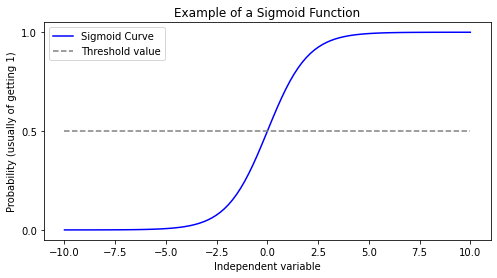

In [3]:
x = np.linspace(-10,10,100)

#Sigmoid function
y = 1/ (1 + np.exp(x) ** (-1))

#Size of the graph
plt.rcParams['figure.figsize'] = (8, 4)

#Title of the graph
plt.title('Example of a Sigmoid Function')

#labels for x and y axes
plt.xlabel('Independent variable')
plt.ylabel('Probability (usually of getting 1)')

#Initializing a threshold value, usually by 0.5
threshold_value = 0.5

#Simplified yticks
plt.yticks([0,threshold_value,1])

#Plotting graphs: sigmoid curve with the threshold value
plt.plot(x, y, color = 'blue', label = 'Sigmoid Curve')
plt.plot(x, [threshold_value for i in range(len(x))], linestyle = '--', color = 'grey', label = 'Threshold value')

#Showing our legend
plt.legend()

Okay, since there is a **graph**, a certain things can be discussed.
1. What is the **formula** for our probability graph?
2. What is the **threshold** value?

**Answer(1)** \
The **formula** for our probability graph is \
\
<font size = 4.5>$p(z) = \frac{1}{1 + e^{-z}}$</font>\
\
**it comes from logit (log of odds) function that is explained further**\
\
Where $p(z)$ is our **probability**, $e$ is the **mathematical constant** and $z$ is an **independent variable**.\
(Exponent function with **any** number could be used, but usually we take the number $e$, because it is the **base** for **natural logarithm** and also frequently used)\
\
**Answer(2)**\
The threshold value is the value which divides our graph into three parts:
- The one below the threshold value - usually gets group label "0" as the answer
- The one above the threshold value - usually gets group label "1" as the answer
- In the point of the threshold value the probability we can get either "1" or "0"

So we can change the **threshold value** to what we need(for example, only data with probability higher than 0.7(or 70%) will give the label "1", other - "0").\
\
But usually it is **0.5** (or 50%), the exact same point where the probability:
- **greater** than 0.5 (>50%)  gives label "1"
- **lower** than 0.5 (<50%)  gives label "0" 
- **in** 0.5(50% exactly)  gives "1" or "0" with 50% chance

## How to find Logistic Regression probability function

Well, firstly we need to **connect** the probability to a **regular line**. But why?\
So since there is a linear relationship between independent variable and dependent in probablity function, we need to **find** our **sigmoid function** from **linear regression** perspective .\
It can be done with **logit** (or log of odds) function, which can **"transform"** a regression line to a sigmoid curve.\
\
The equation is\
\
<font size = 4.5>$ln(\frac{p(x)}{1-p(x)}) = \beta_0 + \beta_1 \cdot x_1 + \space\text{...}\space + \beta_n \cdot x_n \\
p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x_1 + \space\text{...}\space + \beta_n \cdot x_n)}}$</font> \
\
Let's do some graphs for better understanding

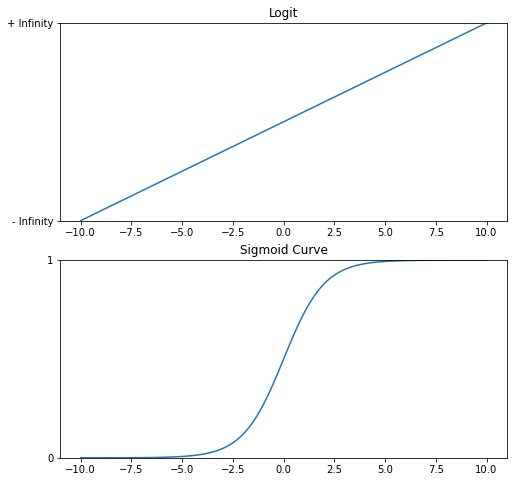

In [4]:
#Creating figure with two subplots - sigmoid and logit
fig,(axLog, axSig) = plt.subplots(2)
fig.set_size_inches(8, 8)

#Title and good demonstration plot of Sigmoid
axSig.set_title('Sigmoid Curve')
axSig.set_yticks([0,1])
axSig.set_ylim([0,1])

#plot the sigmoid graph
axSig.plot(x, y)

#Title and good demonstration plot of Logit
axLog.set_title('Logit')
axLog.set_ylim([-10,10])
axLog.set_yticks([-10,10])
axLog.set_yticklabels(['- Infinity', '+ Infinity'])

#probability function, which we get from logit
p = 1/(1+ np.exp(-x))

#y of logit
ylog = np.log(p/(1-p))

#plot the logit graph
axLog.plot(x, ylog)

Look at that transformation! Now all we have to do is to maximize the precision of our probability function.

So let $p(x)$ be the function that shows us the probability of getting label '1'\
And if we correctly get all the points, we'll have that $p(x)$ for given $x$, labeled '1', has a value of 1, and labeled '0' has a value of 0\
\
So we'd have that\
<font size = 4.5>$\displaystyle \prod _{s \text{ in } y_i = 1} p(x) \qquad\text{Maximizes to 1}$</font>\
\
($y_i$ is our class, $s$ - sample)\
\
And also\
<font size = 4.5>$\displaystyle \prod _{s \text{ in } y_i = 0} (1 - p(x)) \qquad\text{Maximizes to 1}$</font>\
\
We can assume that **likelihood function** is\
<font size = 4.5>$ L = \displaystyle \prod _{s \text{ in } y_i = 1} p(x) \space \times \prod _{s \text{ in } y_i = 0} (1 - p(x)) \qquad\text{
Also should be maximized to 1}$</font>\
\
If we combine it to one final formula of likelihood\
\
<font size = 4.5>$L = \displaystyle \prod _{s} p(x)^{y_i} \times (1-p(x))^{1-y_i}$</font>

## Log Likelihood


To maximize the function usually we take derivative and equal it to zero.\
It is pretty hard to take derivatives from product, we can make it easier - to take derivatives from logarithm of likelihood.\
\
<font size = 4.5>$logL = \displaystyle  \sum _{i = 1} ^s y_i(\space log (\space p(x) \space)\space) \times (1-y_i)(\space 1 - \space log(\space p(x)\space)\space)$</font>\
\
And now we can maximize this one

## Maximizing the function

How do we maximize this log function?\
The functions with **exponents** and **logarithms** are called **transcendental functions**(we cannot get the exact answer, we could only be really really **close** to the answer)\
We can use number of approaches to solve this problem and get the answer we want.
I'll use the Newton-Rhapson's approach.

## Newton-Rhapson's method

Let's assume that we have a trancendental function $f(x)$, and we need to find the answer for $f(x)$ = 0.\
The Newton-Rhapsons method works this way:\
\
<font size = 4.5>$x_{new} = x_{previous} + \frac {f(x_{previous})}{f'(x_{previous})}$</font>\
\
Where with $x_{new}$ we approach the answer we would have for $f(x)$ = 0.\
The more iterations we do - the closer we are to the answer.\
For first iteration we don't really know $x_{prev}$, so it could be generated randomly.

We have to estimate our parameters: $\beta_0, \beta_1, \beta_2, \space \text{...} \space, \beta_n$\
Let's take them as a matrix and use the Newton's method\
<font size = 4.5>$\beta = \begin{bmatrix} 
\beta_0 \\
\beta_1 \\
\text{...} \\
\beta_n
\end{bmatrix}$</font>\
**(n x 1)**\
\
our $f(x)$ = 0 becomes $logL'$ = 0 (because we maximize $logL$, taking the derivative and equaling it to 0)\
For function $logL(\beta)$, with the matrix $\beta$, the derivative is a gradient $\nabla logL(\beta)$ \
\
We need to find where $\nabla logL(\beta)$ = 0, so this gradient is our $f(x)$ in formula now\
\
For the derivative of  $\nabla logL(\beta)$ (second derivative of $logL$) we should use Hessian matrix of $logL$:\
<font size = 4.5>$H_{logL} = \begin{bmatrix}
\frac{\partial^2 logL}{\partial \beta_0^2} & \frac{\partial^2 logL}{\partial \beta_0\beta_1} & \text{.} & \frac{\partial^2 logL}{\partial \beta_0 \beta_n} 
\\
\frac{\partial^2 logL}{\partial \beta_1\beta_0} & \frac{\partial^2 logL}{\partial \beta_1^2} & \text{.} & \frac{\partial^2 logL}{\partial \beta_1 \beta_n}
\\
\text{.} & \text{.} & \text{.} & \text{.}
\\
\frac{\partial^2 logL}{\partial \beta_n\beta_0} & \frac{\partial^2 logL}{\partial \beta_n \beta_1} & \text{.} & \frac{\partial^2 logL}{\partial \beta_n^2}
\end{bmatrix}$ </font>
\
**(n x n)**
\
\
And our formula for estimation is:\
<font size = 4.5>$\beta_{new} = \beta_{prev} + H_{logL(\beta_{prev})}^{-1} \cdot \nabla logL(\beta_{prev})$</font>
\
\
We take $H_{logL}^{-1}$ because there is no division for matrices, we take inverse and multiply.

## Applying Logistic Regression

In [5]:
#importing libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_data = pd.read_csv('data/Titanic.csv')
titanic_data.head(5)
#Where Fare is the price paid, Pclass is person's class on Titanic(1,2,3), sibsp - siblings and spouse on Titanic

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


### Data Analysis

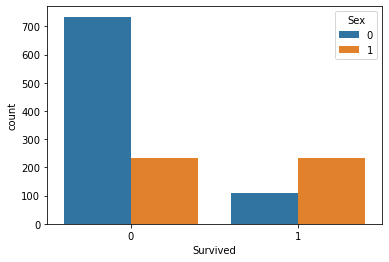

In [6]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_data)

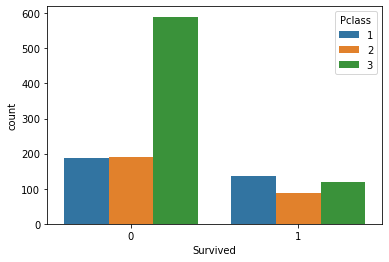

In [7]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_data)

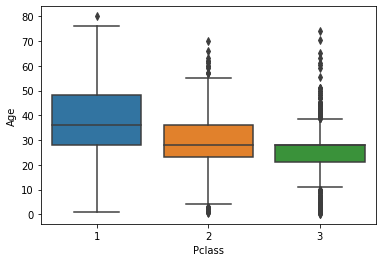

In [8]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_data)

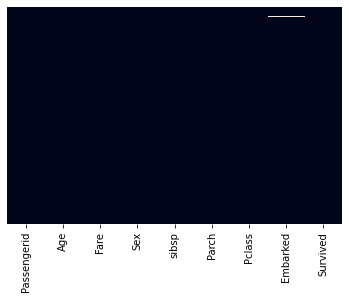

In [9]:
sns.heatmap(titanic_data.isnull(), yticklabels = False, cbar = False)

In [10]:
titanic_data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [11]:
#getting rid of NaNs
titanic_data.dropna(inplace = True)

In [12]:
titanic_data.head(5)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [13]:
#Taking the independent variables and the dependent one
X = titanic_data[['Age', 'Fare', 'Sex', 'Pclass']]
y = titanic_data['Survived']

In [14]:
#importing model, train/test split and accuary score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
#splitting our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [16]:
#fitting the model
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#making prediction
prediction = logmodel.predict(X_test)

In [18]:
#printing accuracy score
accur = round(accuracy_score(y_test, prediction)*100, 2)
print(str(accur) + '%')

79.91%
